In [3]:
%run SAT_help_functions.ipynb

In [70]:
prior = utils.BoxUniform(low  =[0,0.5, 0,0.1], 
                         high =[3,  2, 1,0.9])

n_sim = 100
param = np.array(prior.sample((n_sim,)))

In [71]:
df_all = pd.DataFrame(columns = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time'])

for i in range(n_sim):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftConstant(drift = param[i,0]),
                  noise=NoiseConstant(noise =1),
                  bound=BoundCollapsingLinear(B = param[i,1],t = param[i,2]),
                  overlay=OverlayNonDecision(nondectime=param[i,3]),
                  dx=.001, dt=.001, T_dur=5)

    samp = model.solve().resample(1000)
  
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift = Fittable(minval=0, maxval=4),
                                      x=Fittable(minval=-10, maxval=10),t=0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=.3, maxval=3)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.001, T_dur=5)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sim = pd.DataFrame({
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Self-excitation': np.array(model_fit.parameters()['drift']['x']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime'])
                          }, index=[i])
    df_all = pd.concat((df_all,df_sim))
    #df_all.to_csv("DDMc-OUM-crossfitting")

0


Info: Params [1.44965101 0.91228625 1.76498404 0.46134813] gave 1327.0185992865318
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_80962/1604782070.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat((df_all,df_sim))


1


Info: Params [ 3.2113871  -0.59493775  1.69326405  0.79719384] gave 24.897113792246916


2


Info: Params [0.52586407 1.08611764 1.3991196  0.78520198] gave 2708.094074092352


3


Info: Params [2.61151091 0.29639578 1.67248784 0.49417002] gave 34.19182456326138


4


Info: Params [0.53022078 1.32352872 0.87407949 0.36907082] gave 1696.371942093252


5


Info: Params [2.86605226 1.17398222 1.88839302 0.53574531] gave -491.0887782417875


6


Info: Params [0.22108242 2.8103078  2.93779042 0.61897916] gave 1955.2043069135502


7


Info: Params [3.12926085 3.36667875 0.74249736 0.16369829] gave -1707.7836605820953


8


Info: Params [0.34848233 1.56774291 2.98412128 0.61667502] gave 2908.4105603545286


9


Info: Params [1.11459839 0.56047622 1.79854616 0.09226457] gave 2161.501815152248


10


Info: Params [0.38373838 3.01073241 2.92600752 0.61327778] gave 1683.3164895849372


11


Info: Params [0.51179387 1.53590179 1.75605652 0.49243405] gave 2615.0855374885273


12


Info: Params [1.03172401 0.3598891  1.28277099 0.64948189] gave 2098.5572105505053


13


Info: Params [1.50496817 1.05108859 1.64824495 0.65894539] gave 1109.7966458418382


14


Info: Params [2.19875871 3.91517117 0.89098338 0.7870523 ] gave -813.2115205384966


15


Info: Params [ 2.36686353 -0.11605451  1.59128215  0.22208411] gave 482.4391643423692


16


Info: Params [2.03786002 1.80954357 1.05931992 0.45017674] gave -152.46761226742697


17


Info: Params [1.24809574 2.60277413 2.55183524 0.72893465] gave 984.4773907552393


18


Info: Params [0.71954822 2.70711004 1.90000969 0.43099234] gave 1577.4591894388986


19


Info: Params [3.26345796 6.31251447 0.65293076 0.81618734] gave -2138.7806203117216


20


Info: Params [2.0013089  1.65530259 1.47928998 0.65582758] gave 128.3259012754043


21


Info: Params [ 3.94256974 -0.492794    1.70366675  0.47740635] gave -645.5640420837173


22


Info: Params [1.54609052 0.80402043 2.12240453 0.38124665] gave 1307.309882034824


23


Info: Params [1.98318807 1.06100373 2.21140562 0.76998483] gave 564.3813388927852


24


Info: Params [ 0.70176919 10.          0.97975175  0.67888586] gave -713.3096825126071


25


Info: Params [2.49863012 1.01484034 0.94402956 0.84532112] gave -624.2254800309012


26


Info: Params [ 3.96522174 -2.57949192  1.10824947  0.60642456] gave -521.1799960652613


27


Info: Params [ 2.52523838 -1.11395591  1.63366864  0.75307539] gave 1156.1218968823418


28


Info: Params [2.64851151 0.75171336 1.70592602 0.90750533] gave -199.14081440983944


29


Info: Params [ 0.53040881 -1.54717342  0.51364632  0.80025236] gave 679.5239444606681


30


Info: Params [5.04270358e-02 8.64315130e-01 2.92303126e+00 1.95556585e-03] gave 4056.0311075308905


31


Info: Params [0.2893409  0.87360399 2.93537172 0.49893781] gave 3789.557565552477


32


Info: Params [1.89766069 6.43109065 0.67695119 0.75394974] gave -1027.815235554025


33


Info: Params [0.49090867 6.59481488 0.94042359 0.30082699] gave 77.22398909654225


34


Info: Params [0.3560468  4.62744268 1.8753823  0.20482327] gave 964.7793583845394


35


Info: Params [2.34756624 1.62660141 0.73531276 0.40265416] gave -824.5141522300074


36


Info: Params [0.49919308 9.02723184 1.01168026 0.51819341] gave -450.94829384443545


37


Info: Params [0.66436756 2.40205093 1.0377789  0.59714492] gave 1451.6796613302909


38


Info: Params [0.36373901 2.72003157 2.82935163 0.02112968] gave 1873.5378214292


39


Info: Params [1.53389545 0.12546963 1.95951876 0.70821136] gave 1712.7882149056609


40


Info: Params [0.14835553 1.16289997 1.37775764 0.43544233] gave 3028.343442350795


41


Info: Params [2.8106271  2.34643835 1.07467396 0.55845249] gave -1063.660084838708


42


Info: Params [0.24672626 2.35341889 2.99842981 0.59506672] gave 2270.2051298623123


43


Info: Params [0.77042206 4.33124461 2.55563958 0.32024362] gave 813.7336747482034


44


Info: Params [0.22722394 2.01786591 2.96960047 0.36755413] gave 2497.867949575327


45


Info: Params [2.71118606 5.61120425 0.59690634 0.60009937] gave -1737.9345172300123


46


Info: Params [0.1491873  1.36900008 2.77828112 0.39233905] gave 3346.5144911024513


47


Info: Params [0.57776787 2.01949447 2.86847358 0.49047553] gave 2192.4090605263004


48


Info: Params [2.37966919 0.78204907 1.86307808 0.2877115 ] gave 132.22086715677875


49


Info: Params [1.20343619 9.3577703  0.73712755 0.46603339] gave -899.135279001929


50


Info: Params [2.9060157  0.57990702 1.17289931 0.31642611] gave -715.6899320621163


51


Info: Params [1.11019257 1.58384506 1.58621701 0.18390665] gave 1631.6663635393297


52


Info: Params [2.16960348 1.50854744 1.55438943 0.32797059] gave 2.152213636588044


53


Info: Params [2.75642624 1.3824869  2.23623593 0.31472349] gave -375.9106954742278


54


Info: Params [0.76721441 2.10330327 0.82711786 0.25404675] gave 1064.2505648824203


55


Info: Params [ 2.76769193 -1.40730711  0.5858838   0.68322916] gave -1168.432844604516


56


Info: Params [2.87499301 0.60453949 1.16815331 0.26854821] gave -686.7092261241488


57


Info: Params [2.61075276 0.57034171 1.27892851 0.17578691] gave -332.85933130458045


58


Info: Params [1.35165958 2.72541002 1.24925626 0.44340632] gave 629.5502447207599


59


Info: Params [0.03030904 3.16682301 1.97033612 0.60129366] gave 1729.618827426194


60


Info: Params [0.83896269 3.42919665 1.12398699 0.68827978] gave 922.2390063017605


61


Info: Params [1.40866643 1.97366297 0.65684137 0.38062434] gave -0.40787097606943234


62


Info: Params [ 3.38383651 -0.71528422  1.70775363  0.81909936] gave -32.89853942488668


63


Info: Params [1.05445457 5.76915702 1.08774522 0.59232326] gave 22.535115059232396


64


Info: Params [2.68678756 0.82311777 1.83720312 0.43305225] gave -210.18936626151034


65


Info: Params [1.93255516 5.34244719 0.78824565 0.78348334] gave -818.578533107724


66


Info: Params [1.10986432 3.04797672 2.11423922 0.77931754] gave 978.4397283401788


67


Info: Params [0.10356691 1.81114677 2.90323355 0.47129195] gave 2847.74473620614


68


Info: Params [2.19514027 3.9894345  0.75180374 0.87611193] gave -930.5872587651797


69


Info: Params [1.66790643 2.38028328 1.38480443 0.45791743] gave 359.1165279784273


70


Info: Params [0.8246101  0.37889851 2.03436164 0.89492061] gave 2771.195864228907


71


Info: Params [0.25974956 3.87530869 0.61921927 0.66721084] gave 257.28048992509605


72


Info: Params [0.12368195 2.5575698  2.51284889 0.01810353] gave 2130.4263610343933


73


Info: Params [1.47353012 2.90223017 1.01748943 0.36708894] gave 245.04488672457921


74


Info: Params [9.05811166e-02 1.12364162e+00 2.87200024e+00 1.97793524e-03] gave 3718.26491429779


75


Info: Params [1.59407002 1.02100011 1.87841281 0.6563706 ] gave 1042.7631286997457


76


Info: Params [1.55334769 9.61678631 0.74108001 0.78190639] gave -1158.5891185765172


77


Info: Params [2.36195469 0.96042971 2.54393674 0.61020726] gave 247.52540997610322


78


Info: Params [0.11896366 2.84332262 2.71974947 0.4990315 ] gave 1887.1420118266437


79


Info: Params [2.04017558 3.35993633 0.99253255 0.21935916] gave -475.5228814375097


80


Info: Params [2.72656866 0.7026504  2.22185325 0.60287719] gave -54.0205497798036


81


Info: Params [0.17459238 2.46321899 0.88839132 0.36789032] gave 1451.9262941238158


82


Info: Params [1.89271366 3.36418743 0.92564145 0.22491417] gave -346.9855184081253


83


Info: Params [ 3.65755456 -1.36664293  1.77318626  0.65671946] gave 347.3333918880779


84


Info: Params [0.27674392 2.37426138 2.9753119  0.4080141 ] gave 2157.993506868792


85


Info: Params [3.0632591  6.54862885 0.93349604 0.1478246 ] gave -1851.370503895408


86


Info: Params [1.69147686 2.46442018 1.1167226  0.77272302] gave 181.5157824708294


87


Info: Params [2.62009525 1.69450233 2.95863693 0.17105103] gave -290.6402625625312


88


Info: Params [1.45326721 0.34297349 2.03277271 0.20583386] gave 1724.076182946832


89


Info: Params [2.73921514 5.15518361 0.69406116 0.1424106 ] gave -1575.4869907250882


90


Info: Params [1.97916817 2.88056048 1.78002402 0.28134066] gave -65.38806989500074


91


Info: Params [1.04242651 1.97834712 2.9663397  0.40612484] gave 1601.382106963842


92


Info: Params [1.61698528 8.01403812 0.94897487 0.79389264] gave -834.8000592399131


93


Info: Params [0.29618223 3.4614878  2.0612567  0.65966157] gave 1512.6364183964624


94


Info: Params [1.03335236 2.89238497 2.79271751 0.742251  ] gave 1152.224194410493


95


Info: Params [1.08947745 2.682754   2.06919004 0.80497889] gave 1202.4351652301739


96


Info: Params [1.20857536 2.11648208 1.26853849 0.1839778 ] gave 1094.1904259225066


97


Info: Params [1.53677588 1.63911555 2.02514651 0.71421635] gave 936.3003961768236


98


Info: Params [0.97502842 1.58239854 2.9492449  0.38420728] gave 1956.4419045472637


99


Info: Params [1.73786912 1.04459402 2.11150547 0.0820664 ] gave 899.8240835855784


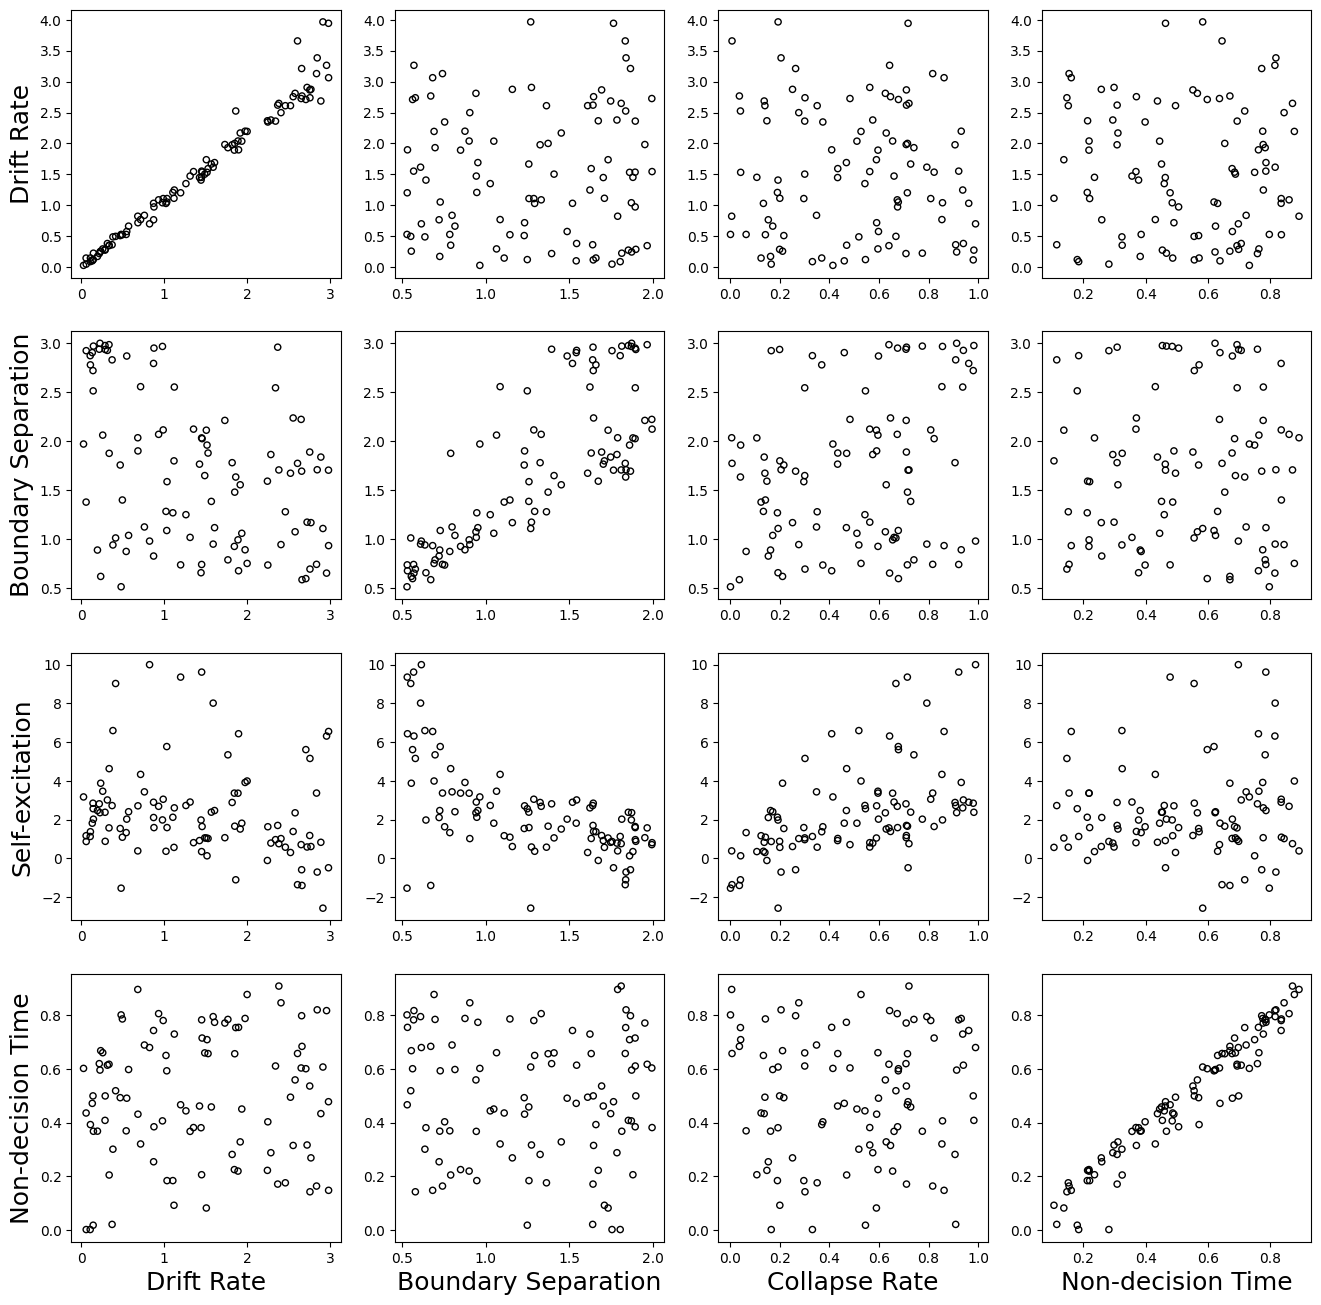

In [72]:
par_labels = ['Drift Rate','Boundary Separation', 'Collapse Rate', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all)), par_labels, par_fitted_labels, s = 20, figsize=(16,16))

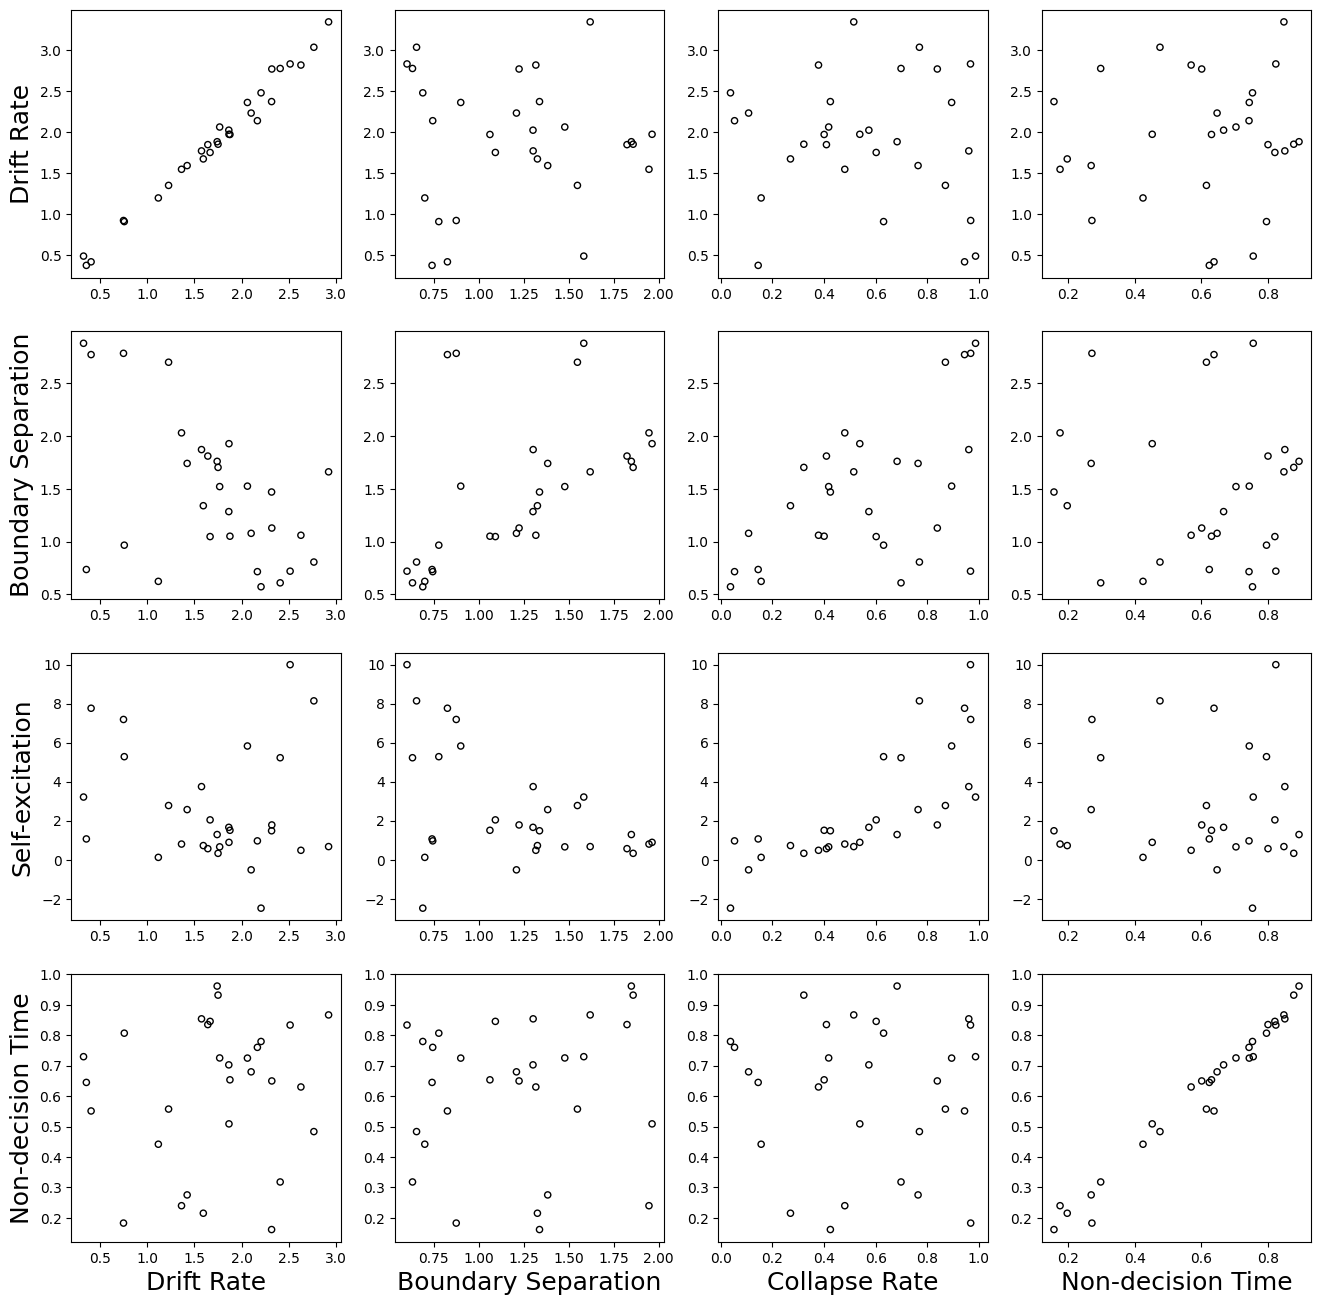

In [69]:
par_labels = ['Drift Rate','Boundary Separation', 'Collapse Rate', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all)), par_labels, par_fitted_labels, s = 20, figsize=(16,16))

In [59]:
prior = utils.BoxUniform(low  =[0,0.5, 0,0.1], 
                         high =[3,  2, 4,0.9])

n_sim = 100
param = np.array(prior.sample((n_sim,)))

In [60]:
df_all = pd.DataFrame(columns = ['Drift Rate','Boundary Separation', 'Collapse Rate', 'Non-decision Time'])

for i in range(n_sim):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftLinear(drift = param[i,0],x=param[i,2], t=0),
                  noise=NoiseConstant(noise =1),
                  bound=BoundConstant(B=param[i,1]),
                  overlay=OverlayNonDecision(nondectime=param[i,3]),
                  dx=.001, dt=.001, T_dur=5)
    
    samp = model.solve().resample(1000)
  
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift = Fittable(minval=0, maxval=4)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundCollapsingLinear(B = Fittable(minval=.3, maxval=3), 
                                              t = Fittable(minval=0, maxval=2)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.001, T_dur=5)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sim = pd.DataFrame({
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Collapse Rate': np.array(model_fit.parameters()['bound']['t']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime'])
                          }, index=[i])
    df_all = pd.concat((df_all,df_sim))
    #df_all.to_csv("DDMc-OUM-crossfitting")

0


Info: Params [0.68698347 0.56748167 0.12666742 0.27544382] gave 360.91343760433324
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_80962/3279520366.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat((df_all,df_sim))


1


Info: Params [2.45845778 1.43897352 0.20628459 0.38095577] gave -49.57972104654944


2


Info: Params [2.68294855 0.53179974 0.16576178 0.17082584] gave -1556.32215419866


3


Info: Params [1.54230494 0.7810903  0.10181    0.17924214] gave 365.2083689576536


4


Info: Params [1.72895104 1.95273078 0.25212978 0.87397626] gave 1157.5945723835757


5


Info: Params [0.36882867 1.04101308 0.2356249  0.93157128] gave 2168.2383415699182


6


Info: Params [1.24105796 1.10218464 0.10349255 0.46290721] gave 1428.2193395539457


7


Info: Params [1.63173765 1.04455167 0.09077213 0.86053171] gave 709.8411065889908


8


Info: Params [1.26947907 0.99763866 0.19582029 0.51074904] gave 1031.8677282601639


9


Info: Params [2.02519946 0.82816592 0.21807458 0.19918921] gave -292.35456011693077


10


Info: Params [1.59968389 0.73573579 0.01505699 0.2910793 ] gave 298.56516501405645


11


Info: Params [1.84995698 0.82071742 0.13968573 0.25406982] gave 3.1009440367836874


12


Info: Params [0.88921809 0.83859465 0.27151089 0.95496099] gave 993.3022791126514


13


Info: Params [1.7194865  1.04608567 0.1243919  0.79954425] gave 536.4226251170746


14


Info: Params [0.93601945 1.01485308 0.05645886 0.48684725] gave 1901.0242817489298


15


Info: Params [1.84417664 1.37555349 0.25389542 0.23995531] gave 566.7705391896661


16


Info: Params [2.18169051 0.77048591 0.         0.72190767] gave -338.14906026122094


17


Info: Params [1.43918933 1.19110127 0.05328443 0.80282617] gave 1265.3820318664402


18


Info: Params [1.71584806 0.97390219 0.17501091 0.64384175] gave 387.66871101315985


19


Info: Params [0.86555229 0.87111244 0.26459344 0.8306205 ] gave 1097.016367294203


20


Info: Params [2.54703438 1.06864844 0.35729942 0.48624499] gave -641.1501577153518


21


Info: Params [2.42708856 1.11511556 0.14587618 0.92120073] gave -277.329893667153


22


Info: Params [2.60632786 0.98695476 0.26409194 0.70660945] gave -711.6938367645747


23


Info: Params [2.9888061  1.78915912 0.         0.67462502] gave -95.21575709163977


24


Info: Params [1.60829559 0.55766668 0.0703013  0.35859478] gave -358.6558295725865


25


Info: Params [1.92060444 1.13030588 0.11797766 0.53858886] gave 378.9999372030122


26


Info: Params [1.62870229 0.86360364 0.15325424 0.26401041] gave 360.4235077447117


27


Info: Params [0.84264531 1.23671889 0.14378985 0.80388846] gave 2280.778730828306


28


Info: Params [0.06601613 1.3337254  0.20740225 0.98728777] gave 3174.763405307768


29


Info: Params [0.55933756 0.96020489 0.08307474 0.27210843] gave 2238.3937682301594


30


Info: Params [1.30335346 0.81097781 0.1104227  0.38239497] gave 749.6384278754302


31


Info: Params [2.04011504 0.99061143 0.30372052 0.41924826] gave -135.92468396654544


32


Info: Params [1.15551186 1.89740708 0.15220773 0.11509869] gave 2244.17679170643


33


Info: Params [0.28918367 0.52184043 0.03755623 0.79037028] gave 431.54679301103727


34


Info: Params [1.98752048 0.99975466 0.19524017 0.73976411] gave 48.751551652143746


35


Info: Params [1.82458102 0.85085768 0.18638234 0.24356492] gave 35.43657467350789


36


Info: Params [3.03980049 0.95927312 0.13680732 0.42210792] gave -1047.4322789381122


37


Info: Params [1.53176806 0.86521706 0.24932059 0.86473581] gave 342.81938957192347


38


Info: Params [1.2185931  0.65620824 0.09242748 0.85295298] gave 367.8964294392873


39


Info: Params [3.2553823  1.54414828 0.         0.51748957] gave -515.1126571896406


40


Info: Params [0.13919013 1.16326651 0.12824588 0.96536795] gave 3083.0321352097503


41


Info: Params [1.20886555 0.96397098 0.04335558 0.4417015 ] gave 1345.2325611803508


42


Info: Params [0.9103289  0.86534291 0.01667904 0.43099378] gave 1655.6545576919639


43


Info: Params [0.55928441 0.82990739 0.2338686  0.6061235 ] gave 1305.953304634168


44


Info: Params [2.51093461 1.62167075 0.29090435 0.24789591] gave -36.596681271088116


45


Info: Params [0.3630688  0.79711922 0.19030844 0.16804463] gave 1514.9009706394777


46


Info: Params [2.87498329 1.15941982 0.47052565 0.29907769] gave -922.5929920101125


47


Info: Params [1.80607085 0.78326873 0.30666354 0.47243628] gave -214.4942811542769


48


Info: Params [0.70485529 1.33704813 0.0605209  0.09204083] gave 2929.844551173454


49


Info: Params [0.10073138 0.86351243 0.31332028 0.26740313] gave 1416.1010383530434


50


Info: Params [1.08125674 1.05583127 0.21302151 0.99838258] gave 1378.8287220368634


51


Info: Params [1.41841917 0.79701614 0.14737577 0.84373377] gave 487.8537588396424


52


Info: Params [2.6922842  1.11403654 0.         0.39344388] gave -415.79184789465074


53


Info: Params [1.31611798 0.91442661 0.14048873 0.79730161] gave 917.6286730556191


54


Info: Params [0.39032643 0.71502449 0.13180588 0.37578574] gave 1251.0953689423905


55


Info: Params [2.00883189 1.83289162 0.         0.5050683 ] gave 1019.1998371915709


56


Info: Params [0.13852977 0.96112166 0.0438301  0.74847739] gave 2760.838702800141


57


Info: Params [2.13995427 1.09417955 0.09993371 0.70413623] gave 72.21429168017373


58


Info: Params [2.81551566 0.77694718 0.         0.65954157] gave -1005.0884037308884


59


Info: Params [2.40078495 0.81503816 0.13733519 0.47606551] gave -648.2207478085178


60


Info: Params [0.86468206 0.89815241 0.27463012 0.70017256] gave 1164.7964650827685


61


Info: Params [1.07408321 1.09025274 0.         0.39126074] gave 1925.0576227553697


62


Info: Params [1.3404242  0.69403437 0.10371064 0.80603222] gave 383.13516820846576


63


Info: Params [2.0847566  0.84009406 0.00224455 0.18285227] gave -107.15859893980956


64


Info: Params [1.65596778 0.60623768 0.09845179 0.89892882] gave -251.46045328394553


65


Info: Params [3.32795729 1.44230804 0.         0.42825245] gave -659.401289109512


66


Info: Params [0.80832419 1.14072248 0.13921443 0.87420994] gave 2174.9125541872268


67


Info: Params [2.52963171 1.08225159 0.16153939 0.92658776] gave -436.8125701303594


68


Info: Params [0.97876915 0.64890722 0.11089676 0.42630445] gave 542.8721901410283


69


Info: Params [2.2586489  0.65096457 0.10181887 0.13821894] gave -782.7961243329984


70


Info: Params [0.20943367 0.99186296 0.15948229 0.25754107] gave 2309.6386341451002


71


Info: Params [1.20078176 0.82458773 0.2252845  0.87970777] gave 721.4232910052618


72


Info: Params [1.31769391 0.71511593 0.19486295 0.32351131] gave 321.2328989221019


73


Info: Params [0.67851223 1.07047949 0.03749461 0.69341815] gave 2550.320096729359


74


Info: Params [1.75899666 1.11972159 0.05842674 0.21713704] gave 658.4769271022702


75


Info: Params [2.19551707 0.87182219 0.28521004 0.3227209 ] gave -465.9516771434557


76


Info: Params [0.96918307 0.95924213 0.16289083 0.82658481] gave 1445.239457887274


77


Info: Params [1.72067775 1.19959407 0.20726744 0.66464493] gave 623.7427846980539


78


Info: Params [1.17474235 0.88737051 0.02328295 0.59832797] gave 1285.2381462396552


79


Info: Params [1.24411592 0.88525244 0.18421913 0.56364354] gave 827.8533793530021


80


Info: Params [0.16543689 0.52495121 0.07065435 0.38183765] gave 392.3410921316523


81


Info: Params [1.79945126 0.99746164 0.14569019 0.50107063] gave 342.91835212163465


82


Info: Params [2.38015781 1.03131113 0.04449338 0.79031359] gave -228.86697910553306


83


Info: Params [2.65970241 0.8588415  0.00892762 0.30333224] gave -733.8487978587293


84


Info: Params [0.63139807 0.84040711 0.32249519 0.90083622] gave 1125.9323000067434


85


Info: Params [1.88037684 0.85362122 0.31613282 0.24419761] gave -168.78875638922233


86


Info: Params [2.91459469 0.65638072 0.2010006  0.81021779] gave -1478.270642882535


87


Info: Params [2.16584578 0.56741894 0.17497978 0.61338169] gave -975.393094499534


88


Info: Params [2.02007613 0.79944163 0.17960031 0.1646044 ] gave -288.18157291908847


89


Info: Params [1.94898663 0.5817015  0.04649138 0.62168564] gave -575.6194064656895


90


Info: Params [0.77629987 0.94054807 0.19160691 0.69367374] gave 1561.09091499744


91


Info: Params [1.57016782 0.59000022 0.         0.3120386 ] gave -94.7336023201434


92


Info: Params [1.08406223 1.07429689 0.14752828 0.3547278 ] gave 1554.197461411462


93


Info: Params [0.72282332 0.513585   0.1205363  0.65681379] gave 0.33897217458491014


94


Info: Params [0.26706221 0.86186794 0.16072412 0.90337919] gave 1811.3898238822499


95


Info: Params [1.17774564 1.45650406 0.03010898 0.16853914] gave 2094.1311860049


96


Info: Params [1.17752624 0.94017843 0.12653761 0.52810658] gave 1183.4380051404


97


Info: Params [0.53771766 0.79388886 0.1722284  0.66680471] gave 1359.4870342740628


98


Info: Params [0.51215443 0.73796016 0.05116304 0.68853776] gave 1536.9977908078736


99


Info: Params [2.25308506 0.80974731 0.13441883 0.45799633] gave -487.0231550986881


In [55]:
np.array(df_all).shape

(20, 4)

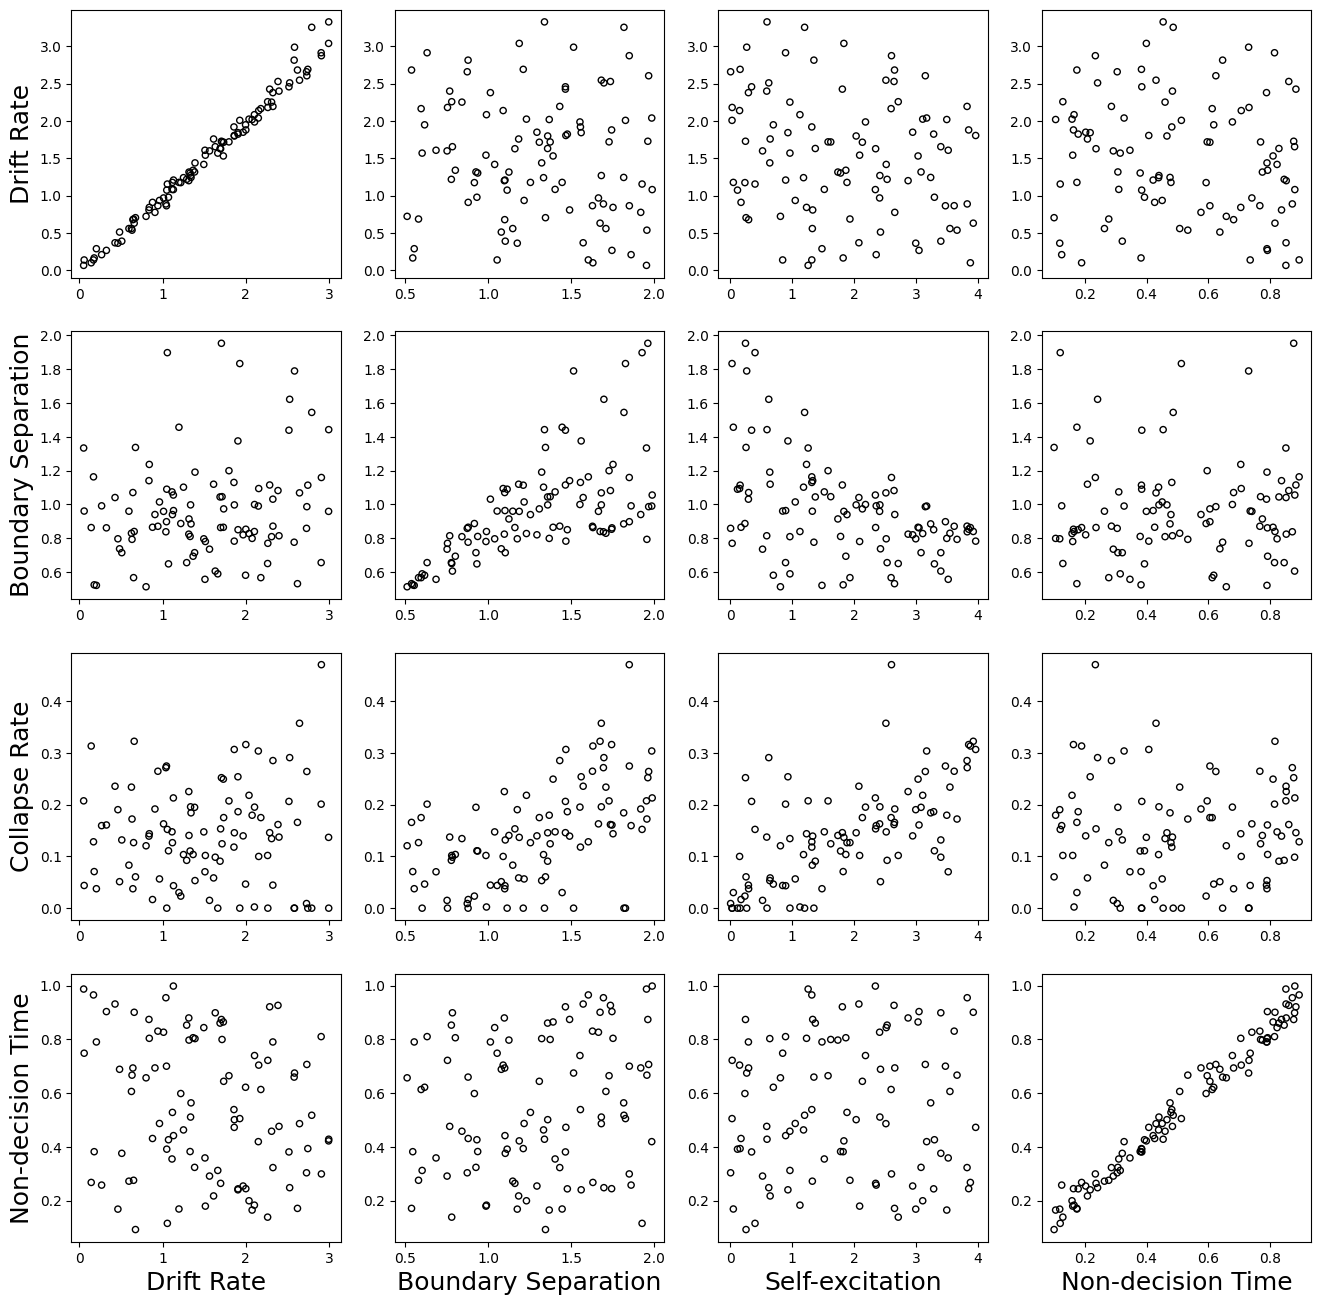

In [61]:
par_labels = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Collapse Rate', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all)), par_labels, par_fitted_labels, s = 20, figsize=(16,16))

## DDM-OUM

In [27]:
prior = utils.BoxUniform(low  =[0,0.5, 0.1], 
                         high =[3,  2, 0.9])

n_sim = 100
param = np.array(prior.sample((n_sim,)))

In [28]:
df_all_DDM = pd.DataFrame(columns = ['Drift Rate','Boundary Separation', 'Non-decision Time', 'BIC'])
df_all_OUM = pd.DataFrame(columns = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time', 'BIC'])

for i in range(n_sim):
    print(i)
    model = Model(name='Simple model',
                  drift=DriftConstant(drift = param[i,0]),
                  noise=NoiseConstant(noise =1),
                  bound=BoundConstant(B = param[i,1]),
                  overlay=OverlayNonDecision(nondectime=param[i,2]),
                  dx=.01, dt=.01, T_dur=5)

    samp = model.solve().resample(1000)
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift = Fittable(minval=0, maxval=4)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=.3, maxval=3)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.01, dt=.01, T_dur=5)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    df_sim = pd.DataFrame({
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                           'BIC':model_fit.get_fit_result().value()
                          }, index=[i])
    df_all_DDM = pd.concat((df_all_DDM,df_sim))

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift = Fittable(minval=0, maxval=4),
                                      x=Fittable(minval=-10, maxval=10),t=0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=.3, maxval=3)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.01, dt=.01, T_dur=5)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sim = pd.DataFrame({
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Self-excitation': np.array(model_fit.parameters()['drift']['x']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                           'BIC':model_fit.get_fit_result().value()
                          }, index=[i])
    df_all_OUM = pd.concat((df_all_OUM,df_sim))
    #df_all.to_csv("DDMc-OUM-crossfitting")

Info: Params [2.36922824 0.94800752 0.13360937] gave -290.86521913075865


0


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_3942/3276822502.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all_DDM = pd.concat((df_all_DDM,df_sim))
Info: Params [ 2.49890048 -1.63584646  0.76459395  0.1620961 ] gave -284.88390851070744
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_3942/3276822502.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all_OUM = pd.concat((df_all_OUM,df_sim))
Info: Params [0.50093597 1.13336026 0.45797654] gave 3113.7991320566

1


Info: Params [ 0.51924629 -0.77690087  0.96764046  0.50604956] gave 3121.9926326213713
Info: Params [1.42449744 0.62850915 0.14547325] gave 203.51156445266136


2


Info: Params [ 1.46320317 -0.40728428  0.58381655  0.15901112] gave 206.5282531259072
Info: Params [1.29185149 2.01668101 0.33217883] gave 2310.2817638839865


3


Info: Params [ 1.33623433 -0.3765798   1.64030225  0.44742127] gave 2318.9864325985686
Info: Params [0.06831447 1.45311374 0.36988661] gave 3511.9106004797436


4


Info: Params [0.06692459 0.7798795  2.83404414 0.02750961] gave 3451.579864486172
Info: Params [2.33265779 1.27045026 0.68555523] gave 134.89509340795732


5


Info: Params [2.29316628 0.25186794 1.22843937 0.70313563] gave 138.69901160603467
Info: Params [0.87129853 1.5473866  0.38862089] gave 2884.9457678774183


6


Info: Params [0.869809   0.19516242 1.6360601  0.39654538] gave 2889.4974782649324
Info: Params [2.72263859 0.85276129 0.69029747] gave -796.9155161261606


7


Info: Params [ 3.08885106 -4.21484018  0.62481775  0.72561241] gave -790.3034617146548
Info: Params [1.81207832 1.00311204 0.3285314 ] gave 501.6076623889729


8


Info: Params [ 1.84870523 -0.28545143  0.92342422  0.3442538 ] gave 507.92210166564973
Info: Params [0.74393296 0.7417642  0.86206457] gave 1491.3513794938713


9


Info: Params [ 0.78220598 -2.21091291  0.61558291  0.8865499 ] gave 1494.8323037781015
Info: Params [1.57515386 0.99238155 0.26531631] gave 841.8765695597174


10


Info: Params [ 1.60288638 -0.30138617  0.91967953  0.28904983] gave 848.784188788493
Info: Params [1.66474189 0.67944609 0.5768928 ] gave 70.88736522226012


11


Info: Params [ 1.75980822 -3.02050231  0.54926679  0.59444729] gave 77.40335748929357
Info: Params [2.34286728 0.66642422 0.27719807] gave -758.9027500149379


12


Info: Params [ 2.48412989 -3.28543582  0.52873283  0.29727569] gave -754.4869400870106
Info: Params [0.00996618 0.80053543 0.56017162] gave 2272.4324740407696


13


Info: Params [ 0.00988575 -1.59570437  0.67499266  0.59371774] gave 2279.8596251689673
Info: Params [1.66304743 1.06642477 0.37280618] gave 816.9539582238244


14


Info: Params [ 1.78411287 -1.5365704   0.85445868  0.41054454] gave 823.3415225144288
Info: Params [0.14174313 0.99915734 0.69485226] gave 3105.0729689186974


15


Info: Params [0.1415951  0.24204342 1.04440292 0.67971245] gave 3118.362730511259
Info: Params [1.61751307 1.19455027 0.26175788] gave 1042.6899038663928


16


Info: Params [ 1.64845852 -0.17181919  1.12383734  0.28388423] gave 1050.608691521169
Info: Params [1.00449686 0.62484852 0.66440191] gave 615.1189908168429


17


Info: Params [ 1.02368929 -0.25651997  0.5818607   0.67799014] gave 617.0604852452267
Info: Params [2.21230736 1.15959529 0.47343789] gave 161.20055917423835


18


Info: Params [2.20054515 0.34502545 1.16572428 0.48250098] gave 165.2319727518628
Info: Params [1.59512657 1.50506875 0.49312718] gave 1385.8974325059876


19


Info: Params [ 1.87976429 -1.57828759  1.12145867  0.57744198] gave 1387.1958857444802
Info: Params [0.87064886 1.55303967 0.32131555] gave 2860.681220471943


20


Info: Params [0.8571473  0.2448851  1.6402384  0.33346398] gave 2859.3370726871194
Info: Params [0.83542241 1.24896739 0.54601049] gave 2651.3861787769924


21


Info: Params [ 0.86855382 -0.80799213  1.04639951  0.58679444] gave 2659.7388302015033
Info: Params [2.40498369 0.5392695  0.36770262] gave -1137.5913184938759


22


Info: Params [ 2.56628001 -3.77597512  0.44869626  0.37725941] gave -1129.346916754152
Info: Params [2.14767558 0.72130935 0.30172552] gave -388.96436661430505


23


Info: Params [ 2.35246723 -4.10207065  0.55131157  0.32593027] gave -381.8760462954854
Info: Params [2.47429964 0.52531403 0.47528031] gave -1264.1058069380858


24


Info: Params [ 2.63470581 -3.56316576  0.43442041  0.48662569] gave -1256.201225710587
Info: Params [0.9056416  1.38556626 0.68113625] gave 2664.2705104414067


25


Info: Params [ 0.92102068 -0.14909198  1.30003353  0.71652818] gave 2670.384969039764
Info: Params [0.10268608 1.45000671 0.58675753] gave 3277.8545767390037


26


Info: Params [0.10590207 0.77483725 2.96643025 0.17840895] gave 3231.2224547315136
Info: Params [2.45622237 1.47909873 0.5096088 ] gave 192.6042619265356


27


Info: Params [ 2.55822062 -0.43083562  1.29384955  0.54253749] gave 198.51777763295053
Info: Params [2.60558308 1.23389256 0.56896895] gave -202.4472114887392


28


Info: Params [ 2.72540114 -0.55925548  1.0841103   0.59758165] gave -195.0892590663345
Info: Params [2.48720956 0.83012512 0.46040665] gave -594.1631310437514


29


Info: Params [ 2.47193767 -2.15475861  0.67790717  0.48344983] gave -576.7195981571246
Info: Params [1.69342493 1.23005021 0.89612639] gave 956.1393360228169


30


Info: Params [ 1.96707453 -2.97709181  0.82932674  0.97861918] gave 959.5658079316414
Info: Params [1.7102571  0.53831069 0.68414082] gave -463.718826313726


31


Info: Params [  1.90151769 -10.           0.37825151   0.70169015] gave -457.9700214364309
Info: Params [2.57181177 0.85267861 0.50864406] gave -642.3420195311223


32


Info: Params [ 2.96625598 -4.14553697  0.63333572  0.53867699] gave -639.8168109283803
Info: Params [0.71196002 1.45286208 0.45357794] gave 3172.713063681823


33


Info: Params [0.7049699  0.244439   1.57240436 0.43438692] gave 3171.6547530317343
Info: Params [0.76229293 1.16884579 0.42198995] gave 2673.522819478754


34


Info: Params [ 0.79478889 -1.01641368  0.95049365  0.4788868 ] gave 2680.467004704178
Info: Params [0.21674506 1.42399861 0.99597215] gave 3161.433540295268


35


Info: Params [0.20414755 0.8575664  2.73915394 0.71373905] gave 3102.74272811275
Info: Params [0.79843848 1.31155636 0.790014  ] gave 2804.3954474020475


36


Info: Params [0.79620577 0.15189387 1.3346659  0.80459386] gave 2807.085000593214
Info: Params [2.21674814 1.98605117 0.26890819] gave 849.6112277016681


37


Info: Params [ 2.63832843 -0.80797395  1.68879236  0.33796496] gave 856.3335848096268
Info: Params [0.5877611  0.87321433 0.85467399] gave 2173.4569391064447


38


Info: Params [0.5907425  0.47136257 0.91330286 0.85846413] gave 2176.6812650247853


39


Info: Params [2.33349475 1.13546167 0.48621619] gave -13.304303662425355
Info: Params [2.22128674 1.26776114 1.41605522 0.45193204] gave 1.559388707341796
Info: Params [2.57076094 0.56813817 0.695742  ] gave -1183.5010217656807


40


Info: Params [ 2.84571864 -6.03776525  0.44565661  0.70065469] gave -1178.2408865409711
Info: Params [1.43977852 1.80500527 0.80541614] gave 1895.116862722081


41


Info: Params [ 1.47874601 -0.08618804  1.74659217  0.82414434] gave 1901.1383198753765
Info: Params [0.10795376 0.7922429  0.56690837] gave 2245.4692919404038


42


Info: Params [ 0.11138423 -0.59672197  0.73497618  0.57357925] gave 2252.6266543354686
Info: Params [2.07090768 0.5525164  0.44293636] gave -785.5308668210696


43


Info: Params [ 2.30729148 -9.59017958  0.38077647  0.46059267] gave -780.6038081702123
Info: Params [2.75665991 1.80099939 0.26974851] gave 131.87180629534726


44


Info: Params [2.66084758 0.19444499 1.67772002 0.3045007 ] gave 137.12750774475762
Info: Params [0.22750477 1.39982653 0.9227811 ] gave 3372.371544701324


45


Info: Params [0.22295476 0.83557336 2.90011034 0.53235061] gave 3306.152855833687
Info: Params [0.39437738 1.41387758 0.38192276] gave 3662.1297789050136


46


Info: Params [0.38907682 0.7894813  2.55118886 0.09824805] gave 3625.98028830729
Info: Params [2.80581129 0.57286818 0.1158071 ] gave -1406.6945790284046


47


Info: Params [ 3.03594828 -7.39254676  0.43514168  0.12841164] gave -1392.6818472782516
Info: Params [2.72043132 0.66615774 0.17148368] gave -1139.3860780175225


48


Info: Params [ 2.88232018 -3.11953748  0.52875287  0.19531328] gave -1132.3538448171807
Info: Params [2.02148395 1.94429082 0.48709394] gave 1072.7552939194918


49


Info: Params [1.89258536 0.39737499 2.04829107 0.49935583] gave 1078.319873286152
Info: Params [2.80021921 1.33405245 0.44112158] gave -299.7472907245776


50


Info: Params [2.62055305 1.35052082 1.58752354 0.43063902] gave -293.3534530467389
Info: Params [2.48264243 1.70921722 0.6067644 ] gave 351.70766890805237


51


Info: Params [ 2.48479816 -0.08661021  1.52848634  0.65993549] gave 357.1921993355183
Info: Params [0.48315118 0.51491093 0.61229753] gave 309.164472179815


52


Info: Params [ 0.49773226 -0.42690029  0.47675349  0.62345791] gave 310.3508635674677
Info: Params [1.31014611 0.97358079 0.62261999] gave 1248.3499718559779


53


Info: Params [1.30774025 0.45136537 1.01316597 0.62209971] gave 1248.8385415297503
Info: Params [0.7931131  0.63149887 0.53755663] gave 869.577425520514


54


Info: Params [0.80858733 0.05405187 0.60804014 0.54527382] gave 874.1817297700436
Info: Params [0.9943133  1.05127369 0.82684232] gave 2002.2678211287748


55


Info: Params [ 1.00903793 -0.06282299  1.02410796  0.83579842] gave 2010.542693954652
Info: Params [0.97360581 0.82609254 0.68153682] gave 1488.8459522486758


56


Info: Params [ 1.01300467 -1.4476552   0.70992221  0.70659173] gave 1495.4140397156793
Info: Params [0.47795258 0.83359738 0.42245911] gave 2163.0459859888747


57


Info: Params [ 0.48510124 -0.35074408  0.78470414  0.43660274] gave 2170.1204951079203
Info: Params [1.09317924 0.82887826 0.16025834] gave 1319.9053507431847


58


Info: Params [ 1.11760225 -0.58096388  0.76032447  0.17489551] gave 1329.4519168450483


59


Info: Params [2.7592462  1.61548347 0.09366882] gave -10.11905609350221
Info: Params [ 3.18196229 -1.02595961  1.36300865  0.14250533] gave -3.428384178765434
Info: Params [0.36289139 1.33268379 0.88780104] gave 3476.293086952404


60


Info: Params [0.35443345 0.65607383 1.84705839 0.74784034] gave 3476.6881564932796
Info: Params [2.97746196 1.40473678 0.13540972] gave -396.604008708401


61


Info: Params [ 3.94294261 -2.49462133  1.12494272  0.1851464 ] gave -390.33880050731807
Info: Params [0.72654501 1.63306313 0.29848033] gave 3189.745839527292


62


Info: Params [0.72319438 0.10473821 1.64957559 0.33155603] gave 3191.6845212830735
Info: Params [0.26412622 0.87764084 0.70420253] gave 2549.873415301076


63


Info: Params [ 0.27077968 -0.66674055  0.79696984  0.72622088] gave 2557.9817421209195
Info: Params [2.09419312 0.82506277 0.90245058] gave -152.64133219980027


64


Info: Params [ 2.27935418 -3.28044611  0.62146577  0.93285524] gave -149.61519687514044
Info: Params [2.66426958 1.86165838 0.5492529 ] gave 264.77501698381093


65


Info: Params [ 3.06997752 -0.80869537  1.58537971  0.60144025] gave 272.192831653546
Info: Params [2.15185711 1.54058308 0.41997173] gave 601.8354776581099


66


Info: Params [ 2.41154975 -1.17479562  1.20846738  0.48895049] gave 607.3486858294336
Info: Params [0.04943236 1.30177004 0.66917032] gave 3622.3227504357587


67


Info: Params [0.03644079 0.85277984 2.23029424 0.40429675] gave 3600.185258284589
Info: Params [1.30985571 2.01571945 0.123308  ] gave 2270.379019315647


68


Info: Params [ 1.41117618 -0.42004508  1.69130113  0.21374721] gave 2276.148949515674
Info: Params [1.21863889 1.34976297 0.78444653] gave 1925.2951930363731


69


Info: Params [ 1.23208258 -0.1653426   1.25635175  0.81636585] gave 1931.9734306867472
Info: Params [0.2337176  1.41656113 0.66294891] gave 3468.777018954163


70


Info: Params [0.22730434 0.79353172 2.8471269  0.26654455] gave 3418.618852537081
Info: Params [1.21502475 1.44005104 0.91507891] gave 2041.0748060843746


71


Info: Params [ 1.23302793 -0.11729289  1.39446812  0.91202645] gave 2048.5819917188232
Info: Params [2.41470548 1.55579474 0.48744328] gave 303.87841506217137


72


Info: Params [ 3.41571299 -2.0862952   1.30337569  0.53647713] gave 309.82757663907796
Info: Params [1.65927505 1.06470146 0.82986652] gave 816.0753787611616


73


Info: Params [ 1.72454007 -0.76040712  0.9267101   0.85676292] gave 822.3104231400622
Info: Params [1.73487667 1.01271123 0.28727774] gave 629.8729851617616


74


Info: Params [ 1.80734924 -0.95510153  0.86298782  0.3171207 ] gave 637.3616040071892
Info: Params [1.53577177 0.72560411 0.13977867] gave 364.58037470877457


75


Info: Params [1.56261598 0.20793226 0.7007533  0.14214982] gave 371.45611133992054
Info: Params [0.29508061 0.96111662 0.91381663] gave 2814.632491545564


76


Info: Params [ 0.30079869 -0.50510082  0.87128036  0.93294085] gave 2818.9431805392915
Info: Params [1.87031845 1.59793448 0.3725268 ] gave 1033.1456358721198


77


Info: Params [1.87079524 0.08946079 1.59370992 0.38753086] gave 1039.678942653472
Info: Params [2.66388304 1.69899796 0.90925273] gave 149.56602738959108


78


Info: Params [ 3.64795986 -1.68393033  1.46828042  0.95640255] gave 156.27223410146775
Info: Params [1.88425553 1.6764033  0.80981356] gave 1069.6238098090682


79


Info: Params [ 3.12613486 -2.66288794  1.29185457  0.89847849] gave 1071.409774457155
Info: Params [1.8075487  0.658311   0.68167925] gave -146.76255379811752


80


Info: Params [1.83747934 1.40726929 0.70436756 0.68524516] gave -149.18877043833402
Info: Params [1.91108359 1.80580097 0.52778727] gave 1130.534313200633


81


Info: Params [1.84453649 0.09691776 1.65463929 0.58162995] gave 1136.355080076552
Info: Params [1.08670326 1.79765025 0.16127665] gave 2560.1172138402676


82


Info: Params [1.07080646 0.17808775 1.91354619 0.15287166] gave 2564.475701227124
Info: Params [0.87357692 1.14705054 0.79402087] gave 2402.6687017002064


83


Info: Params [ 0.89398694 -0.47730776  1.02296436  0.82147314] gave 2409.09187207093
Info: Params [0.73571995 1.64755912 0.86963652] gave 2815.9872345432054


84


Info: Params [0.72621696 0.21987112 1.80236285 0.84534411] gave 2812.908977596792
Info: Params [2.0636696  1.72396895 0.4849771 ] gave 863.3222111094901


85


Info: Params [ 2.63149767 -1.46253943  1.3731693   0.55650488] gave 869.1288696639973
Info: Params [0.98835549 1.48712162 0.22959987] gave 2577.165378740971


86


Info: Params [ 1.00196985 -0.09510941  1.41415903  0.2512394 ] gave 2582.7342360578027
Info: Params [2.76902377 1.83838257 0.37408739] gave 142.11458538338343


87


Info: Params [ 2.8688562  -0.19433124  1.67828134  0.41024651] gave 149.11225777567108
Info: Params [2.39299799 1.5113936  0.62501984] gave 290.6006536492753


88


Info: Params [ 3.26578879 -2.22200775  1.20196373  0.68635991] gave 296.20992828643426
Info: Params [2.4372043  1.6857981  0.61501229] gave 383.2139706731293


89


Info: Params [ 2.42289029 -0.03837044  1.53878536  0.65356009] gave 388.15256267971745
Info: Params [0.03210823 0.56571117 0.51670111] gave 845.3630364023365


90


Info: Params [ 0.03209982 -1.47103498  0.50648541  0.52788121] gave 849.002219124669
Info: Params [0.17508032 0.84573317 0.33916667] gave 2453.4231569186236


91


Info: Params [0.17554901 0.31397466 0.87238519 0.32752063] gave 2461.5888750529607
Info: Params [2.73340162 2.2025477  0.42169612] gave 400.4915020438557


92


Info: Params [ 3.07515078 -0.59241498  1.8703946   0.49238598] gave 407.93336759962403
Info: Params [0.50506628 0.51183048 0.82408331] gave 386.40394511696684


93


Info: Params [ 0.53827957 -4.98522361  0.41350698  0.83984251] gave 391.29878521082856
Info: Params [1.40507442 0.96855068 0.70263346] gave 1085.3498216605128


94


Info: Params [1.41848862 0.19205105 0.9696976  0.71273   ] gave 1091.9086809422383
Info: Params [2.37637467 1.73313434 0.38054315] gave 485.745853309058


95


Info: Params [2.20478811 0.62253325 1.8429354  0.3998308 ] gave 489.689356733824
Info: Params [1.75937549 1.18342591 0.16513684] gave 803.8060409840067


96


Info: Params [ 1.7864474  -0.23831323  1.09171347  0.18120468] gave 811.3762138397743
Info: Params [1.46984164 1.2553855  0.54249866] gave 1351.2972800523562


97


Info: Params [1.45604224 0.18290819 1.25594371 0.55238524] gave 1353.8871760299944
Info: Params [2.19844967 1.17386125 0.32811754] gave 194.7894289976318


98


Info: Params [ 2.36946974 -1.28212232  0.95339629  0.36097358] gave 202.32678339981055
Info: Params [2.17864598 0.56374081 0.83365948] gave -864.2639155353684


99


Info: Params [ 2.24958681 -0.33831319  0.51519047  0.84319244] gave -863.7609814699653


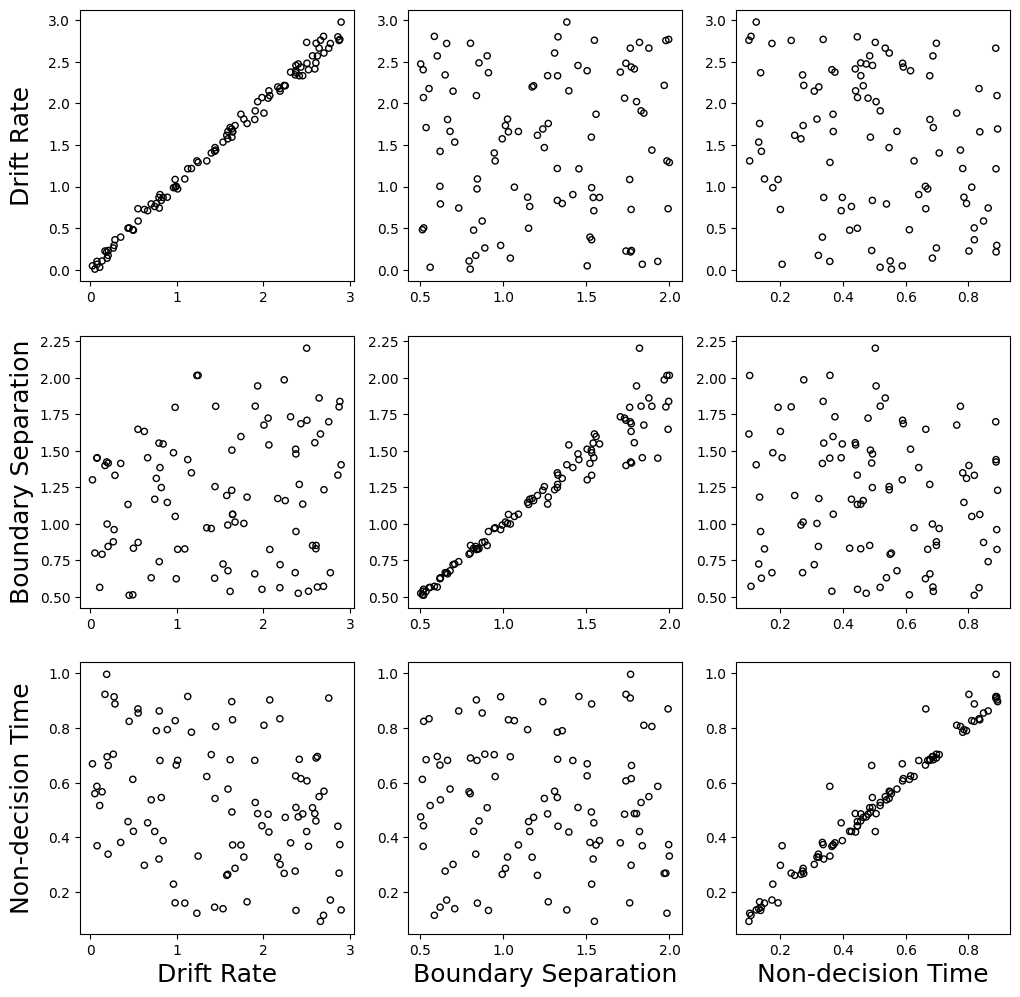

In [29]:
par_labels = ['Drift Rate','Boundary Separation', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all_DDM)[:,0:3]), par_labels, par_fitted_labels, s = 20, figsize=(12,12))

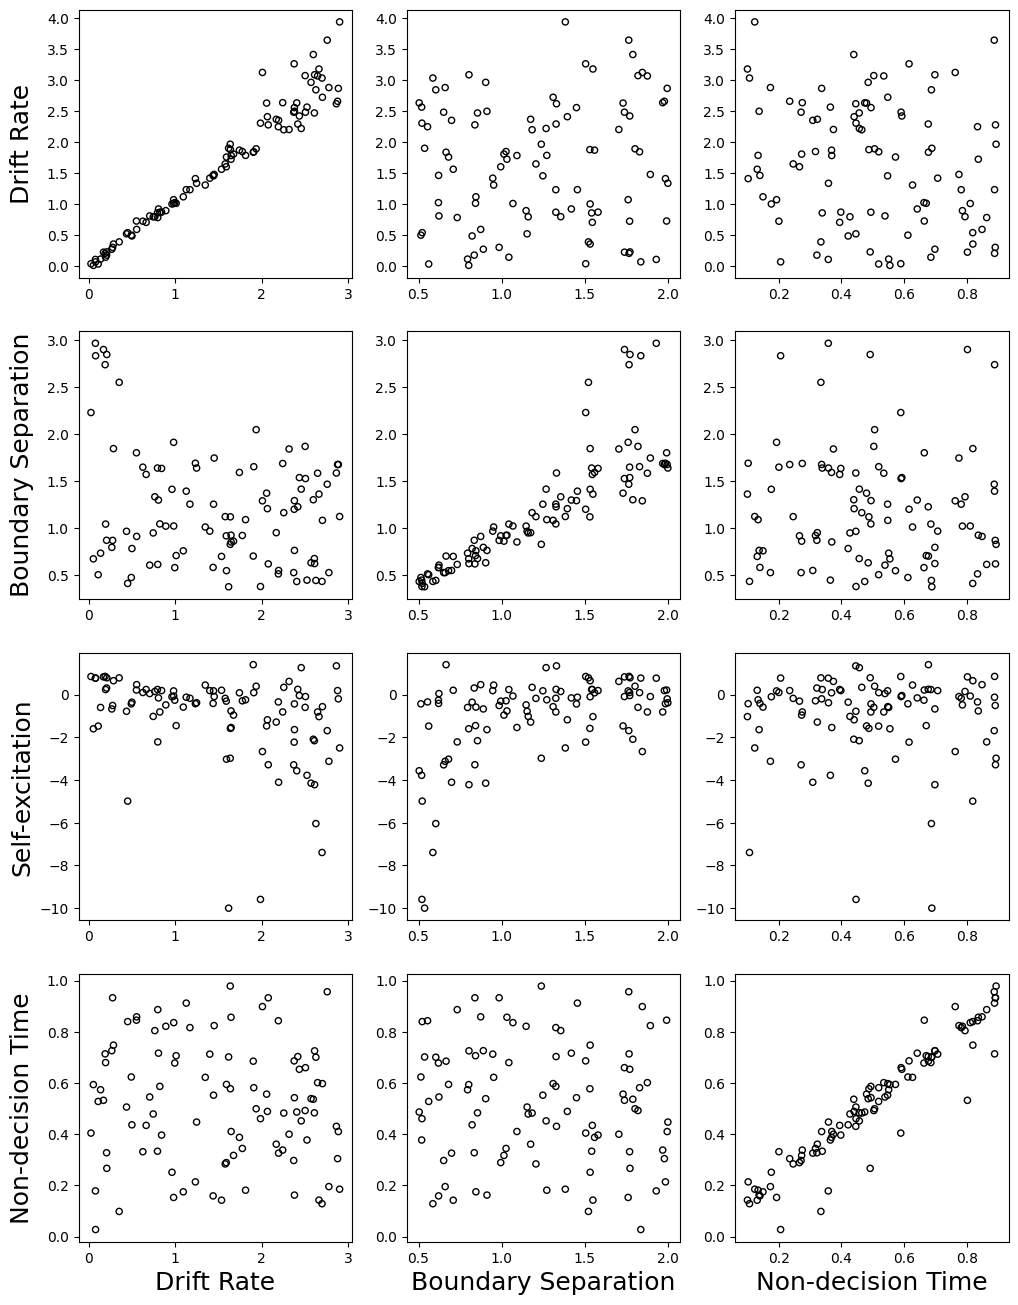

In [30]:
par_labels = ['Drift Rate','Boundary Separation', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all_OUM)[:,0:4]), par_labels, par_fitted_labels, s = 20, figsize=(12,16))

In [31]:
df_all_DDM.to_csv("DDMresultcrossfitting.csv")

In [32]:
df_all_OUM.to_csv("OUMresultcrossfitting.csv")

In [26]:
df_all_OUM['BIC'] < df_all_DDM['BIC']

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: BIC, dtype: bool

In [ ]:
par_labels = ['Drift Rate','Boundary Separation', 'Non-decision Time']
par_fitted_labels = ['Drift Rate','Boundary Separation', 'Self-excitation', 'Non-decision Time']
sim_fit_plot_all(param, (np.array(df_all_OUM)[:,0:4]), par_labels, par_fitted_labels, s = 20, figsize=(12,16))